In [2]:
# Importando módulos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Lendo o dataset
tmdb = pd.read_csv("data/tmdb/tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
## Verificando as notas

# Variável CATEGÓRICA NOMINAL
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [5]:
## Analisando as notas de uma variável categórica

# Verificando a ocorrências das línguas
tmdb.original_language.value_counts()

# Transformando em dataframe
tmdb.original_language.value_counts().to_frame()

# Transformando em dataframe e colocando o index como coluna
contagem_de_lingua = tmdb.original_language.value_counts().to_frame().reset_index()

# Alterando as colunas
contagem_de_lingua.columns = ["original_language", "total"]

contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<AxesSubplot:xlabel='original_language', ylabel='total'>

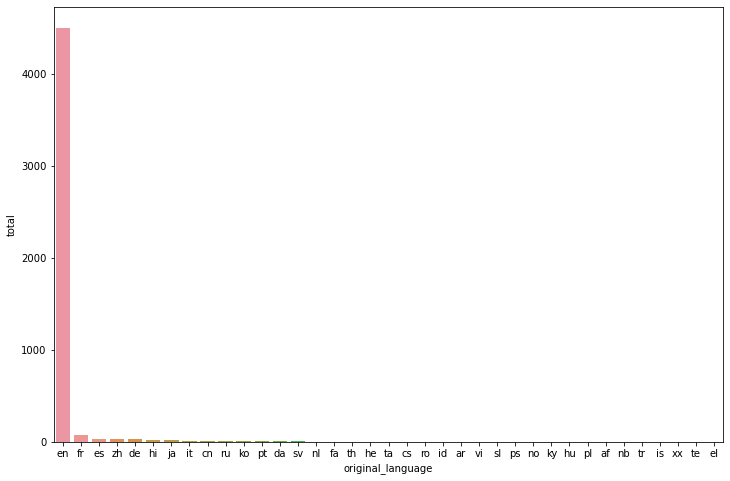

In [6]:
# Fazendo o plot
plt.figure(figsize=(12,8))
sns.barplot(x="original_language", y="total", data = contagem_de_lingua)

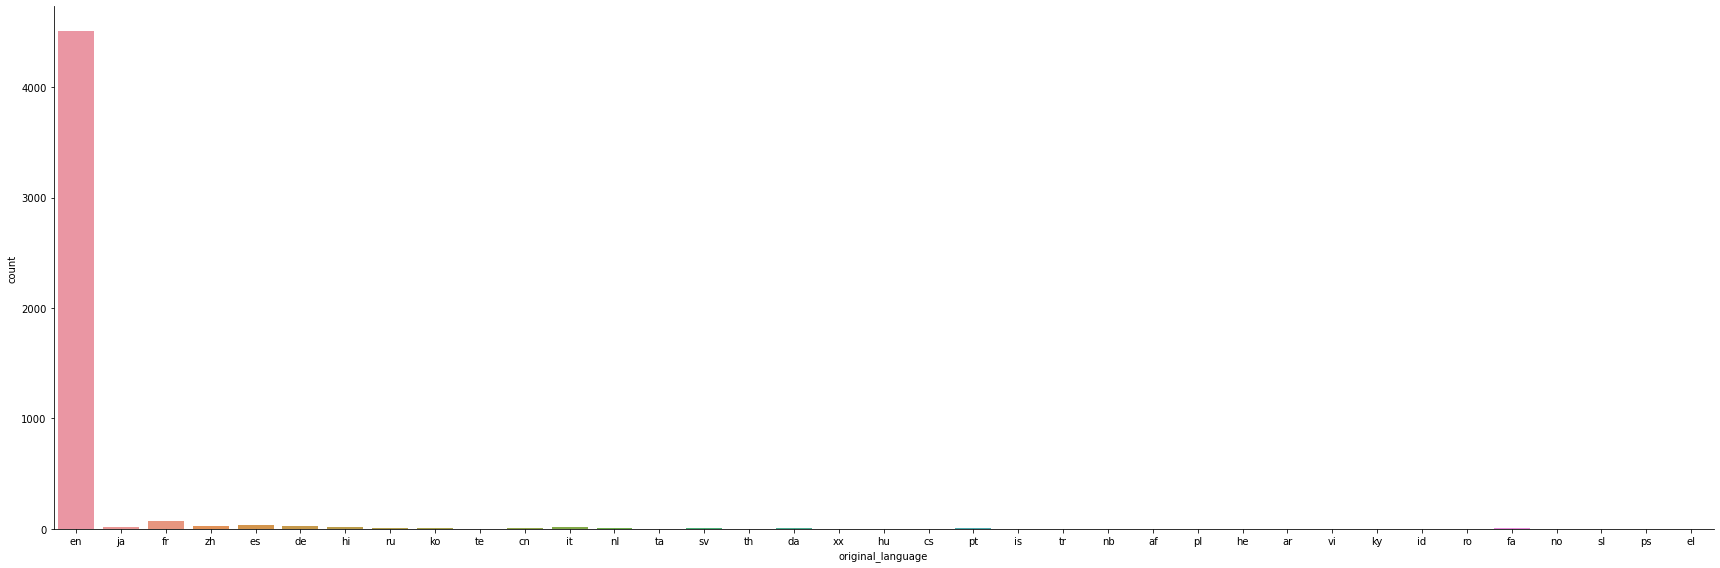

In [7]:
# Plotando de maneira mais fácil kk
sns.catplot(x="original_language", kind="count", data=tmdb, height=8, aspect=3)

In [8]:
# Inglês tem destaque frente às outras linguas, mas como mostrar isso?
# Inglês x outras línguas

total_por_lingua = tmdb["original_language"].value_counts()

# Total geral
total_geral = total_por_lingua.sum()

# Buscando a linha de valor 'en'
total_de_ingles = total_por_lingua.loc["en"]

# Total restante
total_resto = total_geral - total_de_ingles
print(total_de_ingles, total_resto)

4505 298


In [9]:
# Criando um dicionário com esses dados
dados = {
    'lingua': ['ingles', 'outros'],
    'total': [total_de_ingles, total_resto]
}

# Transformando esses dados em um dataframe
dados = pd.DataFrame(dados)
dados.head()

,lingua,total
0,ingles,4505
1,outros,298


<AxesSubplot:xlabel='lingua', ylabel='total'>

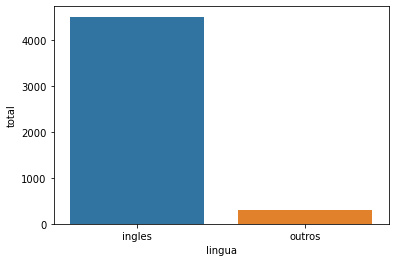

In [10]:
# Plot dos dados
sns.barplot(x="lingua", y="total", data=dados)

([<matplotlib.patches.Wedge at 0x1fddc58ef70>,
 [Text(-1.177276094890901, 0.2324241734382013, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')],
 [Text(-0.6867443886863587, 0.13558076783895073, '93.8%'),
  Text(0.5886380460853802, -0.11621209360813456, '6.2%')])

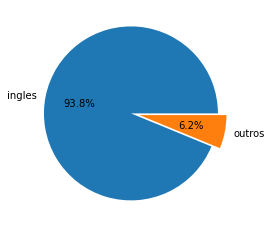

In [11]:
# Plot dos dados em pizza
explode = (0.1, 0)
plt.pie(dados["total"], explode=explode, labels=dados["lingua"], autopct="%1.1f%%")

In [12]:
# Pegando total de outros filmes com exceção de inglês

total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
total_por_lingua_de_outros_filmes

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: original_language, dtype: int64

In [13]:
# Pegando outros filmes com exceção de inglês
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")

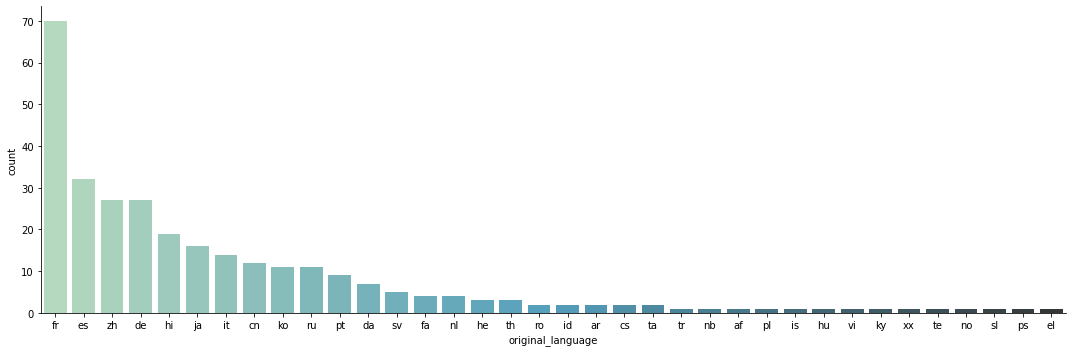

In [14]:
# Plotando de maneira mais agradável
sns.catplot(x="original_language", kind="count", data=filmes_sem_lingua_original_em_ingles, aspect=3, order=total_por_lingua_de_outros_filmes.index, palette="GnBu_d")

# Revisando o papel da média, mediana, medidas de tendência central, dispersão, desvio padrão, boxplot, histograma.

In [15]:
# Verificando os dois primeiros filmes
filmes = pd.read_csv('data/ml-latest-small/movies.csv')
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [16]:
notas = pd.read_csv('data/ml-latest-small/ratings.csv')
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
notas.head(2)

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247


In [17]:
# Selecionando as avaliações dos 2 primeiros filmes
notas_do_toy_story = notas.query('filmeId==1')
notas_do_jumanji = notas.query('filmeId==2')
print(len(notas_do_toy_story), len(notas_do_jumanji))

215 110


In [18]:
print('Nota média do Toy Story: %.2f' % notas_do_toy_story.nota.mean())
print('Nota média do Jumanji: %.2f' % notas_do_jumanji.nota.mean())

# Medias centrais: média, mediana, moda...

Nota média do Toy Story: 3.92
Nota média do Jumanji: 3.43


In [37]:
# O quão distantes estão os pontos da mediana?
print(notas_do_toy_story.nota.std(), notas_do_jumanji.nota.std())

0.8348591407114045 0.8817134921476455


In [19]:
# Quantas pessoas gostaram do filme?
# Quantas odiaram?
# A diferença disso é mto grande?

In [23]:
# Utilizando o numpy com arrays de exemplos
import numpy as np

filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
filme2 = np.append(np.array([5] * 10), np.array([1] * 10))

3.0 3.0


In [38]:
# Mediana
print(filme1.mean(), filme2.mean())
print(np.std(filme1), np.std(filme2))
print(np.median(filme1), np.median(filme2))

3.0 3.0
0.5 2.0
3.0 3.0


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

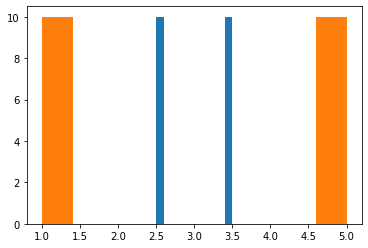

In [27]:
# Histograma de ambos
plt.hist(filme1)
plt.hist(filme2)

{'whiskers': [<matplotlib.lines.Line2D at 0x1fddce3ecd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fddce121c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fddce3e7f0>,
 'medians': [<matplotlib.lines.Line2D at 0x1fddce127f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1fddcdf1640>,
 'means': []}

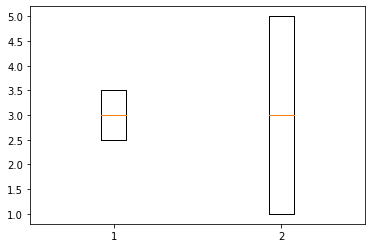

In [29]:
plt.boxplot([filme1, filme2])

{'whiskers': [<matplotlib.lines.Line2D at 0x1fddd96ffd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fddd97d700>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fddd96fc40>,
 'medians': [<matplotlib.lines.Line2D at 0x1fddd97de20>,
 'fliers': [<matplotlib.lines.Line2D at 0x1fddd9891f0>,
 'means': []}

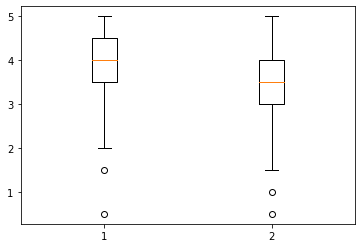

In [32]:
plt.boxplot([notas_do_toy_story.nota, notas_do_jumanji.nota])

<AxesSubplot:xlabel='filmeId', ylabel='nota'>

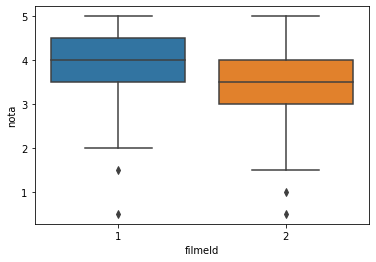

In [33]:
sns.boxplot(x = "filmeId", y = "nota", data = notas.query("filmeId in [1,2]"))